In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []

In [6]:
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cab30af5146fc2ee4a79713d706c5392


In [9]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [19]:
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Processing Record 15 of Set 37 | laguna
Processing Record 16 of Set 37 | hobart
Processing Record 17 of Set 37 | bredasdorp
Processing Record 18 of Set 37 | mezhdurechensk
Processing Record 19 of Set 37 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 37 | ushuaia
Processing Record 21 of Set 37 | unguia
Processing Record 22 of Set 37 | atuona
Processing Record 23 of Set 37 | tiksi
Processing Record 24 of Set 37 | punta arenas
Processing Record 25 of Set 37 | santiago del estero
Processing Record 26 of Set 37 | port elizabeth
Processing Record 27 of Set 37 | tuktoyaktuk
Processing Record 28 of Set 37 | mataura
Processing Record 29 of Set 37 | cape town
Processing Record 30 of Set 37 | hermanus
Processing Record 31 of Set 37 | carnarvon
Processing Record 32 of Set 37 | arraial do cabo
Processing Record 33 of Set 37 | lorengau
Processing Record 34 of Set 37 | saint-joseph
Processing Record 35 of Set 37 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 37 

Processing Record 35 of Set 40 | joshimath
Processing Record 36 of Set 40 | lebu
Processing Record 37 of Set 40 | brae
Processing Record 38 of Set 40 | acarau
Processing Record 39 of Set 40 | hami
Processing Record 40 of Set 40 | narsaq
Processing Record 41 of Set 40 | emerald
Processing Record 42 of Set 40 | kusye-aleksandrovskiy
City not found. Skipping...
Processing Record 43 of Set 40 | touros
Processing Record 44 of Set 40 | portland
Processing Record 45 of Set 40 | toliary
City not found. Skipping...
Processing Record 46 of Set 40 | qarqin
Processing Record 47 of Set 40 | yar-sale
Processing Record 48 of Set 40 | sentyabrskiy
City not found. Skipping...
Processing Record 49 of Set 40 | havoysund
Processing Record 50 of Set 40 | berlevag
Processing Record 1 of Set 41 | nikolskoye
Processing Record 2 of Set 41 | souillac
Processing Record 3 of Set 41 | saskylakh
Processing Record 4 of Set 41 | shizilu
Processing Record 5 of Set 41 | yumen
Processing Record 6 of Set 41 | sao joao da

Processing Record 18 of Set 44 | barcelos
Processing Record 19 of Set 44 | barahona
Processing Record 20 of Set 44 | kaeo
Processing Record 21 of Set 44 | gambo
Processing Record 22 of Set 44 | boizenburg
Processing Record 23 of Set 44 | ungaran
Processing Record 24 of Set 44 | champerico
Processing Record 25 of Set 44 | meybod
Processing Record 26 of Set 44 | leighton buzzard
Processing Record 27 of Set 44 | inuvik
Processing Record 28 of Set 44 | doha
Processing Record 29 of Set 44 | baringo
Processing Record 30 of Set 44 | nizhniy kuranakh
Processing Record 31 of Set 44 | zilupe
Processing Record 32 of Set 44 | smithers
Processing Record 33 of Set 44 | eureka
Processing Record 34 of Set 44 | huesca
Processing Record 35 of Set 44 | rincon
Processing Record 36 of Set 44 | ouegoa
Processing Record 37 of Set 44 | jalu
Processing Record 38 of Set 44 | salalah
Processing Record 39 of Set 44 | kovdor
Processing Record 40 of Set 44 | shestakovo
Processing Record 41 of Set 44 | altamont
Proc

Processing Record 7 of Set 48 | saint-francois
Processing Record 8 of Set 48 | mentok
City not found. Skipping...
Processing Record 9 of Set 48 | leh
Processing Record 10 of Set 48 | nortelandia
Processing Record 11 of Set 48 | yerbogachen
Processing Record 12 of Set 48 | zemio
Processing Record 13 of Set 48 | maraa
Processing Record 14 of Set 48 | owatonna
Processing Record 15 of Set 48 | hihifo
City not found. Skipping...
Processing Record 16 of Set 48 | cleethorpes
Processing Record 17 of Set 48 | anadyr
Processing Record 18 of Set 48 | hauterive
Processing Record 19 of Set 48 | huangnihe
Processing Record 20 of Set 48 | ust-ishim
Processing Record 21 of Set 48 | toba
Processing Record 22 of Set 48 | pinotepa nacional
Processing Record 23 of Set 48 | veraval
Processing Record 24 of Set 48 | naantali
Processing Record 25 of Set 48 | ketchikan
Processing Record 26 of Set 48 | bundaberg
Processing Record 27 of Set 48 | dhidhdhoo
Processing Record 28 of Set 48 | nantucket
Processing Rec

In [20]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laguna,38.42,-121.42,57.99,67,20,9.17,US,2020-04-18 03:20:05
1,Hobart,-42.88,147.33,55.99,47,75,10.29,AU,2020-04-18 03:20:16
2,Bredasdorp,-34.53,20.04,57.99,87,100,4.70,ZA,2020-04-18 03:21:44
3,Mezhdurechensk,53.69,88.06,46.89,51,0,8.48,RU,2020-04-18 03:21:23
4,Ushuaia,-54.80,-68.30,44.60,75,40,4.70,AR,2020-04-18 03:21:45
5,Unguia,8.04,-77.09,75.04,86,77,3.89,CO,2020-04-18 03:21:45
6,Atuona,-9.80,-139.03,82.35,75,84,13.06,PF,2020-04-18 03:17:31
7,Tiksi,71.69,128.87,9.32,93,100,6.04,RU,2020-04-18 03:21:45
8,Punta Arenas,-53.15,-70.92,46.40,81,75,16.11,CL,2020-04-18 03:21:46
9,Santiago Del Estero,-27.80,-64.26,63.34,51,0,7.27,AR,2020-04-18 03:21:46


In [21]:
new_column=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column]
city_data_df.head(10)



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2020-04-18 03:20:05,38.42,-121.42,57.99,67,20,9.17
1,Hobart,AU,2020-04-18 03:20:16,-42.88,147.33,55.99,47,75,10.29
2,Bredasdorp,ZA,2020-04-18 03:21:44,-34.53,20.04,57.99,87,100,4.70
3,Mezhdurechensk,RU,2020-04-18 03:21:23,53.69,88.06,46.89,51,0,8.48
4,Ushuaia,AR,2020-04-18 03:21:45,-54.80,-68.30,44.60,75,40,4.70
5,Unguia,CO,2020-04-18 03:21:45,8.04,-77.09,75.04,86,77,3.89
6,Atuona,PF,2020-04-18 03:17:31,-9.80,-139.03,82.35,75,84,13.06
7,Tiksi,RU,2020-04-18 03:21:45,71.69,128.87,9.32,93,100,6.04
8,Punta Arenas,CL,2020-04-18 03:21:46,-53.15,-70.92,46.40,81,75,16.11
9,Santiago Del Estero,AR,2020-04-18 03:21:46,-27.80,-64.26,63.34,51,0,7.27


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1587235364.3790517

In [27]:
today=time.strftime("%x")

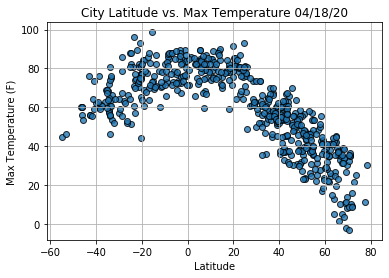

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

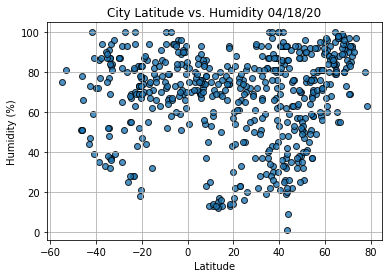

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

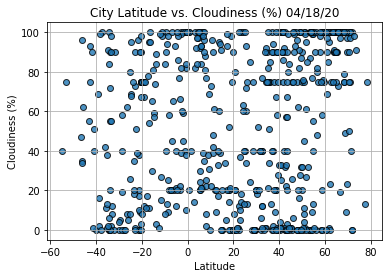

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

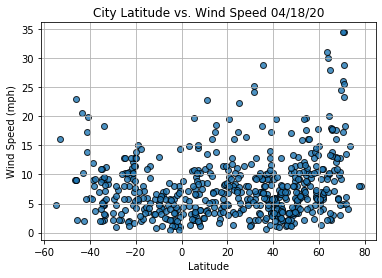

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()